# Final Project Submission #
## Group 10: Ben, Sara, Katy, Roy, Sukshma ##

This is the notebook for the Unit 1 Project. We are including code from previous HW submissions, as well as adding new visualizations and descriptions/comparisons of the models. 

---

## LIF Model
The **Leaky Integrate and Fire (LIF) neuron model** is a simplified representation of the behavior of firing biological neurons. It integrates incoming input over time and generates an output spike when its membrane potential reaches a certain threshold. The LIF model contains a spike generator which sets the membrane potential Vth when spikes occur and repoloarize The LIF neuron model is a simplified representation of the behavior of a biological neuron. It integrates incoming input over time and generates an output spike when its membrane potential reaches a certain threshold. The LIF Model contains a spike generator, which sets membrane potential Vth where spikes occur and repolarizes Vm to a fixed value immediently after the spike, a battery which sets the resting membrane potential, and an integrator which converts inputs into outputs. Benefits to this model is that the model is computationally efficient and easy to implement while also providing a clear understnadning of the basic principles of neuronal behavior. Limitations of the model include lack of biological detail (does not capture full complexity of real neurons) and inability to captture importannt fuctionality principles like refactory periods and spike frequency adaptation. The number of bits in this model is on the lower end because it is a simple model that simply sums the input until threshold, before firing an AP. This also means that the complexity of this model is on the lower end. Despite this, the model still does a relatively good job of representing a very basic model. 

*Difference from Other Models: The LIF model lacks biophysical detail compared to the other models. It's a basic abstraction that sacrifices biological representation for simplicity.*

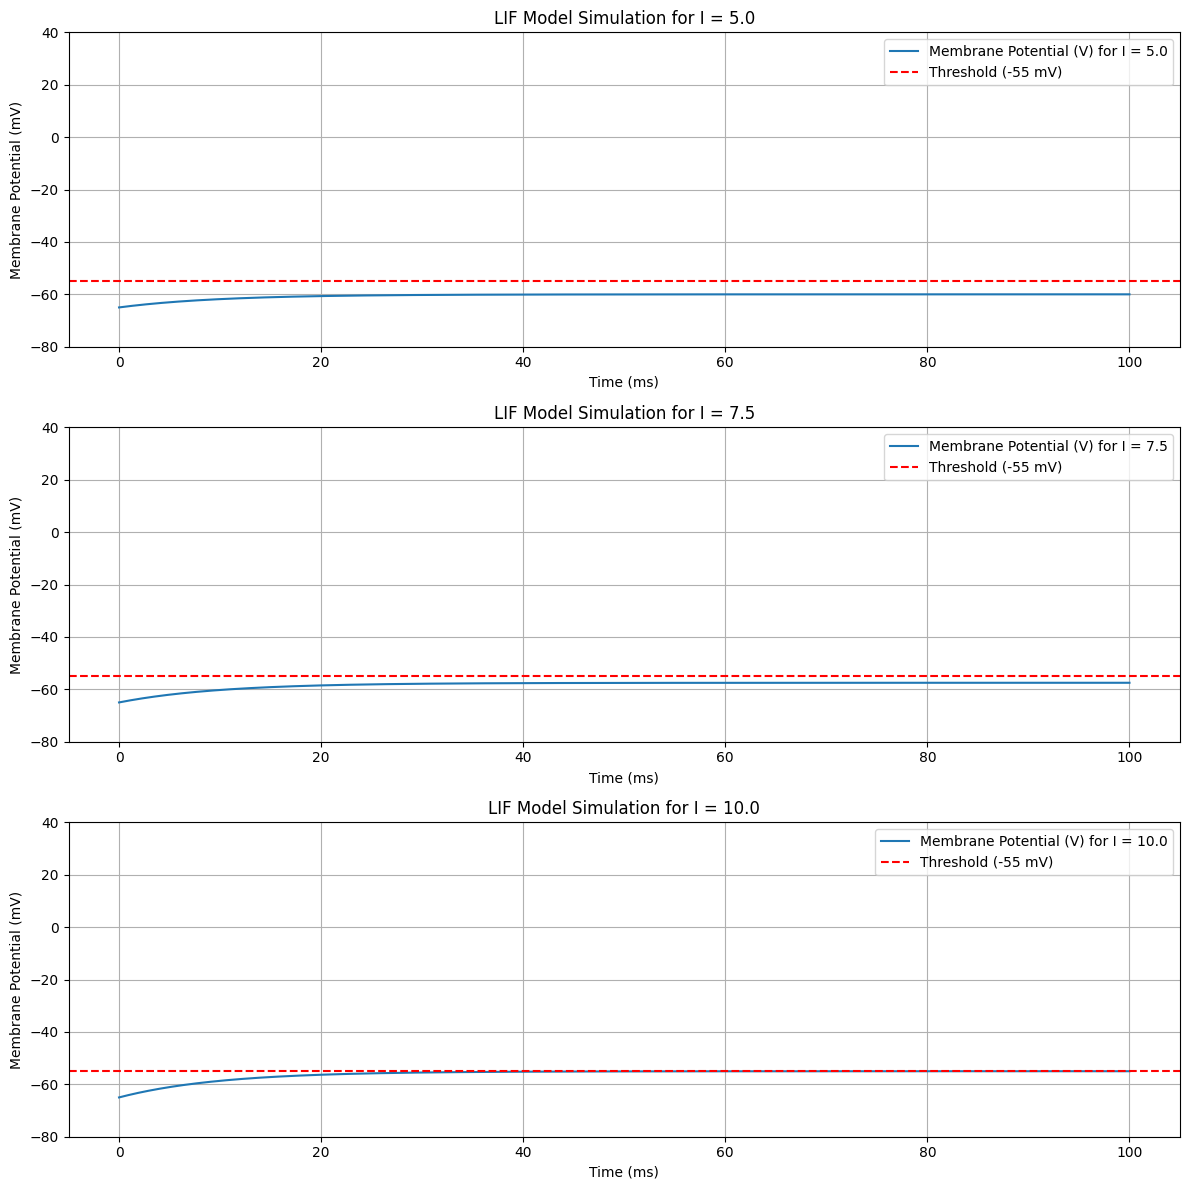

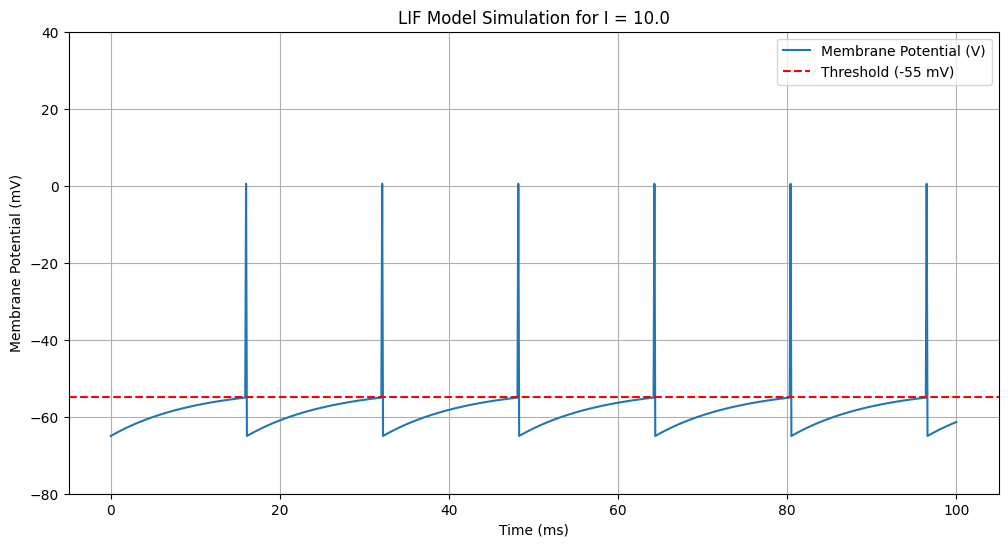

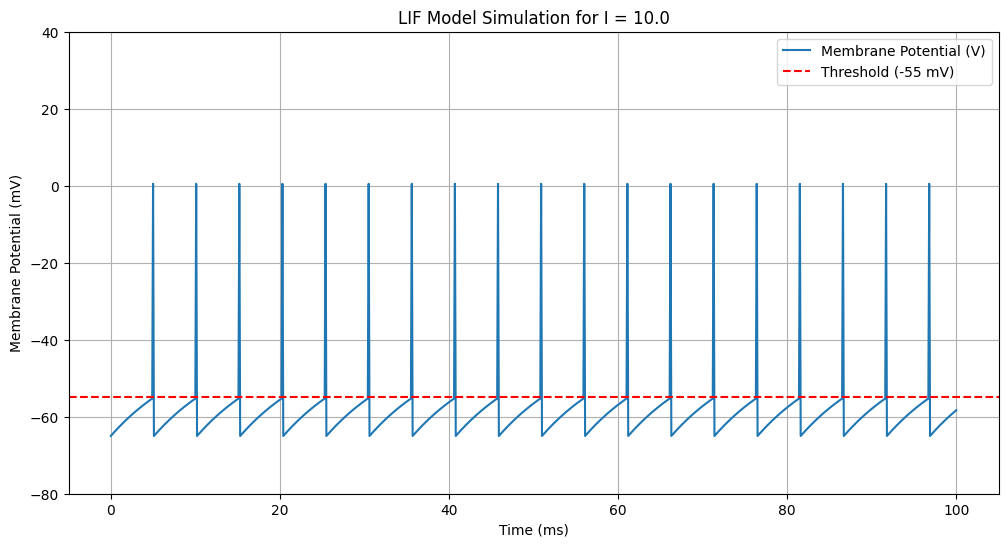

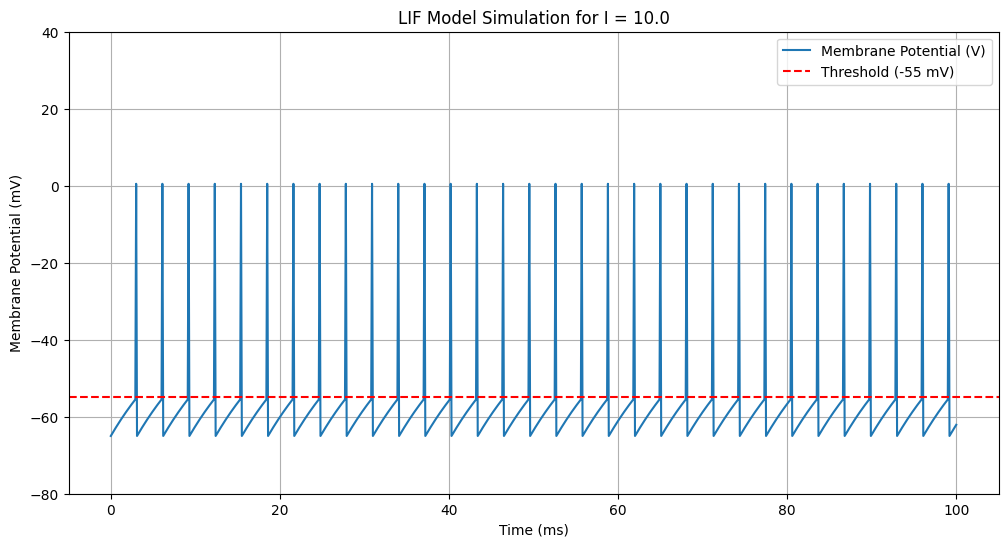

Spike times (ms): [3.1, 6.2, 9.3, 12.4, 15.5, 18.6, 21.700000000000003, 24.8, 27.900000000000002, 31.0, 34.1, 37.2, 40.300000000000004, 43.400000000000006, 46.5, 49.6, 52.7, 55.800000000000004, 58.900000000000006, 62.0, 65.10000000000001, 68.2, 71.3, 74.4, 77.5, 80.60000000000001, 83.7, 86.80000000000001, 89.9, 93.0, 96.10000000000001, 99.2]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the LIF model function
def LIF_model(I, duration, dt=0.1, V_rest=-65.0, V_threshold=-55.0, V_reset=-65.0, Rm=1.0, Cm=10.0, V_spike=0.5):
    """
    Simulates the Leaky Integrate-and-Fire model of a neuron.
    
    Parameters:
    I (float): Input current.
    duration (float): Total time to simulate.
    dt (float): Time step of the simulation.
    V_rest (float): Resting membrane potential.
    V_threshold (float): Threshold potential at which the neuron fires.
    V_reset (float): Potential to which membrane potential is reset after a spike.
    Rm (float): Membrane resistance.
    Cm (float): Membrane capacitance.
    V_spike (float): The value to record a spike (for plotting purposes).

    Returns:
    tuple: Tuple containing the time points (array), membrane potential (array), and spike times (array).
    """
    
    # Calculate the number of time steps
    time = np.arange(0, duration+dt, dt)
    n_steps = len(time)
    
    # Initialize the membrane potential array
    V = np.zeros(n_steps)
    V[0] = V_rest  # Set the initial condition
    spikes = []  # List to record spike times
    
    # Simulate the LIF model
    for i in range(1, n_steps):
        # Calculate the membrane potential
        dVdt = (-(V[i-1] - V_rest) + I * Rm) / (Rm * Cm)
        V[i] = V[i-1] + dVdt * dt
        
        # Check for spikes
        if V[i] >= V_threshold:
            spikes.append(time[i])
            V[i-1] = V_spike  # Add a spike for plotting
            V[i] = V_reset  # Reset the membrane potential
        
    return time, V, spikes

# Define simulation parameters
duration = 100  # Total duration of the simulation in ms
dt = 0.1  # Time step in ms
input_currents = [5.0, 7.5, 10.0]  # Different input currents to test

plt.figure(figsize=(12, 12))

for j, I in enumerate(input_currents):
    # Run the LIF model for each input current
    time, V, spikes = LIF_model(I=I, duration=duration, dt=dt)

    # Create a subplot for each input current
    plt.subplot(len(input_currents), 1, j+1)
    plt.plot(time, V, label=f'Membrane Potential (V) for I = {I}')
    plt.title(f'LIF Model Simulation for I = {I}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
    plt.ylim([-80, 40])
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# Run the LIF model
time, V, spikes = LIF_model(I=12.5, duration=duration, dt=dt)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
plt.title(f'LIF Model Simulation for I = {I}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim([-80, 40])
plt.grid(True)
plt.legend()
plt.show()

# Run the LIF model again with greater current
time, V, spikes = LIF_model(I=25, duration=duration, dt=dt)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
plt.title(f'LIF Model Simulation for I = {I}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim([-80, 40])
plt.grid(True)
plt.legend()
plt.show()

# Run the LIF model again with greater current
time, V, spikes = LIF_model(I=37.5, duration=duration, dt=dt)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
plt.title(f'LIF Model Simulation for I = {I}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim([-80, 40])
plt.grid(True)
plt.legend()
plt.show()

# Print the spike times
print("Spike times (ms):", spikes)


## Updated LIF Model with VGSCs
The **LIF model updated with voltage-gated sodium channels** enhances the previous LIF neuron model by incorporating the dynamics of voltage-gated sodium channels (controlled by the neuron intergrative components), which are crucial for the propagations of action potentials in real neurons once treshold is reached. By incorperating voltage-gated sodium channels in the LIF model, refactory periods are established after the model fires, allowing for a more accurate representation of real neurons Benefits of this model is that there is increased biological realism compared to the previous LIK (making it closer to actual neuronal dynamics) and the capturing of the generation and propogation of action potentials. Some limitations to this model is that adding biophysical detail increases the computational complexity of the model and the model requires more parameter tuning compared to basic LIF neurons. Out of the 3 models that we have to code for this project, this model has the most lines of code and conveys the most amount of information. This means it has a greater number of bits and the model is more complex because when adding the VGSCs, it adds an additional layer of biological realism that adds more nuanced behavior. 

*Difference from Other Models: This model introduces biophysical realism by simulating the mechanisms causing action potential generation, distinguishing it from the simpler LIF neuron. The LIF model with sodium channels is designed to mimic the behavior of individual neurons, incorporating biophysical mechanisms, while neural network focuses on learning patterns and relationships in data without explicit reference to biological mechanisms.*

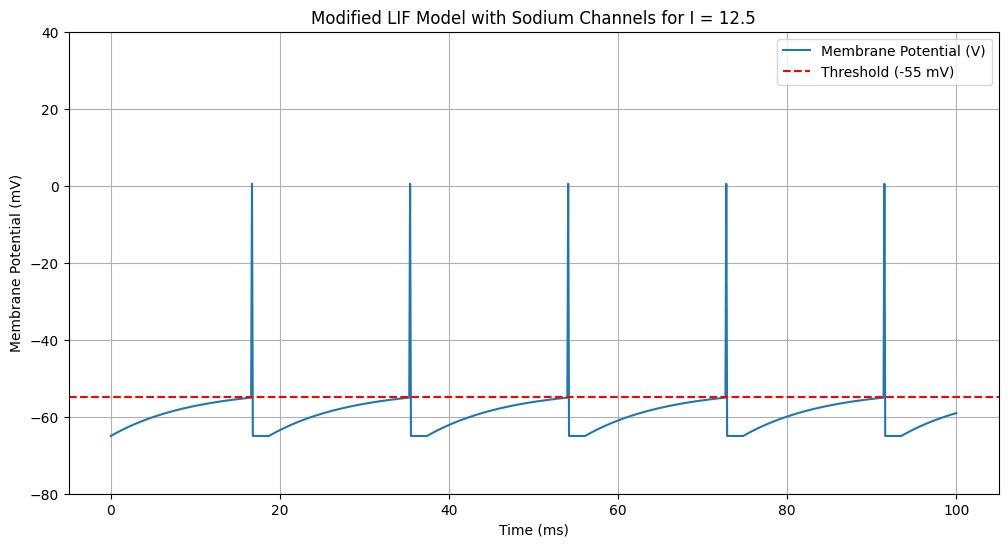

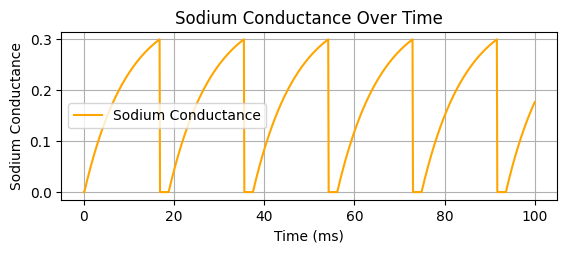

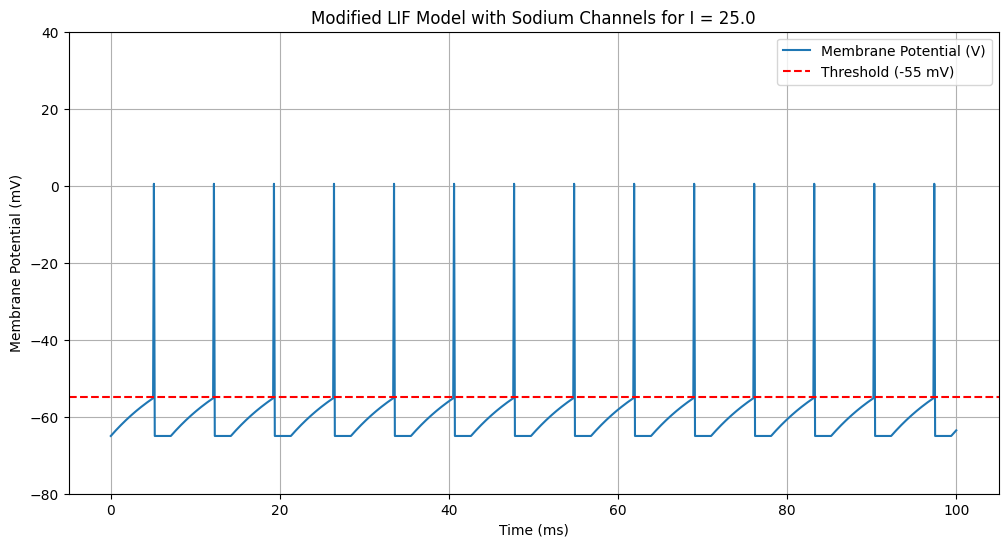

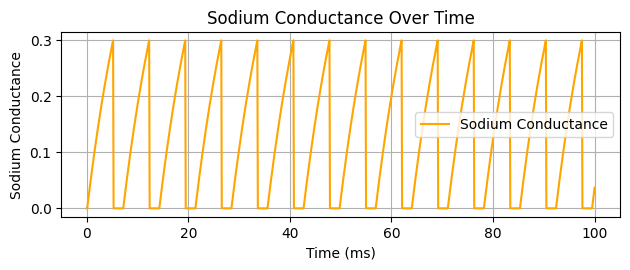

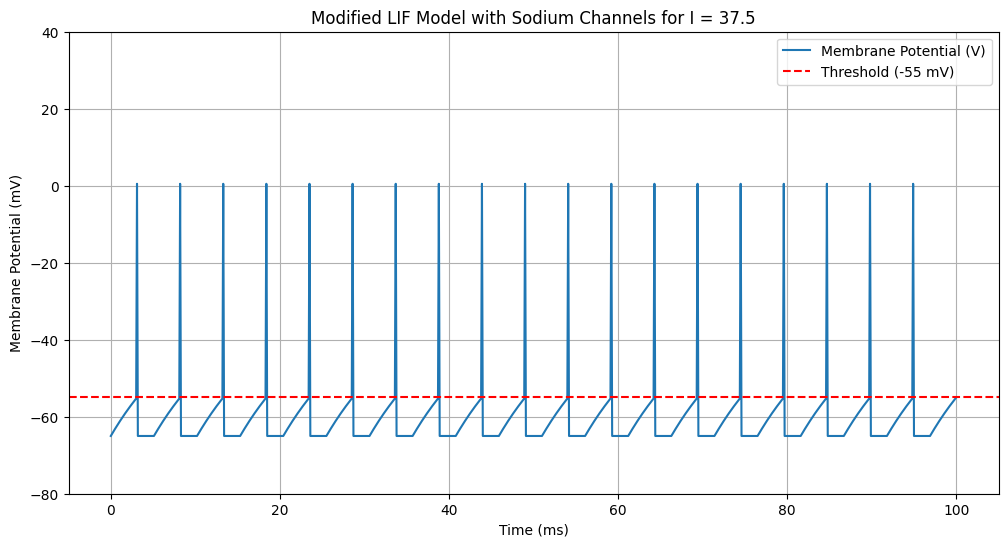

Spike times (ms): [3.2, 8.3, 13.4, 18.5, 23.6, 28.700000000000003, 33.800000000000004, 38.900000000000006, 44.0, 49.1, 54.2, 59.300000000000004, 64.4, 69.5, 74.60000000000001, 79.7, 84.80000000000001, 89.9, 95.0]


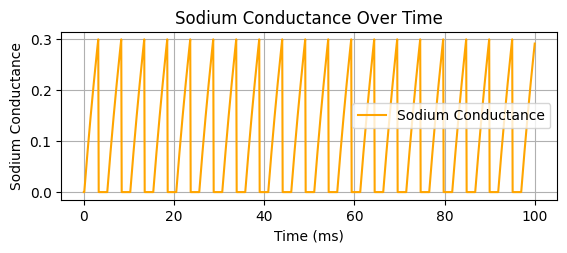

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def LIF_model_with_Na(I, duration, dt=0.1, V_rest=-65.0, V_threshold=-55.0, V_reset=-65.0, Rm=1.0, Cm=10.0, V_spike=0.5, Na_scale=0.03, refractory_period = 2.0):
    """
    Simulates the Leaky Integrate-and-Fire model of a neuron with simple voltage-gated sodium channels.
    """
    time = np.arange(0, duration+dt, dt)
    n_steps = len(time)
    V = np.zeros(n_steps)
    Na_conductance_values = np.zeros(n_steps) # Array to store sodium conductance values
    V[0] = V_rest
    spikes = []
    last_spike_time = -refractory_period # Initialize to a time before start
    
    for i in range(1, n_steps):
        # Sodium conductance (simplified representation)
        Na_conductance = Na_scale * (V[i-1] - V_rest)
        Na_conductance_values[i] = Na_conductance # Stores conductance values

        if time[i] - last_spike_time < refractory_period:
            V[i] = V_reset

        else:
            # Calculate membrane potential with sodium conductance
            dVdt = (-(V[i-1] - V_rest) + I * Rm - Na_conductance) / (Rm * Cm)
            V[i] = V[i-1] + dVdt * dt
    
            if V[i] >= V_threshold:
                spikes.append(time[i])
                V[i-1] = V_spike
                V[i] = V_reset
                last_spike_time = time[i]
                Na_conductance = 0 # Reset sodium conductance

    return time, V, spikes, Na_conductance_values

# Define simulation parameters
duration = 100
dt = 0.1

# Run the LIF model
time, V, spikes, Na_conductance_values = LIF_model_with_Na(I=12.5, duration=duration, dt=dt, refractory_period=2.0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
plt.title('Modified LIF Model with Sodium Channels for I = 12.5')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim([-80, 40])
plt.grid(True)
plt.legend()
plt.show()

# Plot sodium conductance
plt.subplot(2, 1, 2)
plt.plot(time, Na_conductance_values, label='Sodium Conductance', color='orange')
plt.title('Sodium Conductance Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Sodium Conductance')
plt.grid(True)
plt.legend()

# Run the LIF model with greater current
time, V, spikes, Na_conductance_values = LIF_model_with_Na(I=25.0, duration=duration, dt=dt, refractory_period=2.0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
plt.title('Modified LIF Model with Sodium Channels for I = 25.0')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim([-80, 40])
plt.grid(True)
plt.legend()
plt.show()

# Plot sodium conductance
plt.subplot(2, 1, 2)
plt.plot(time, Na_conductance_values, label='Sodium Conductance', color='orange')
plt.title('Sodium Conductance Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Sodium Conductance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Run the LIF model
time, V, spikes, Na_conductance_values = LIF_model_with_Na(I=37.5, duration=duration, dt=dt, refractory_period=2.0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential (V)')
plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
plt.title('Modified LIF Model with Sodium Channels for I = 37.5')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim([-80, 40])
plt.grid(True)
plt.legend()
plt.show()

# Plot sodium conductance
plt.subplot(2, 1, 2)
plt.plot(time, Na_conductance_values, label='Sodium Conductance', color='orange')
plt.title('Sodium Conductance Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Sodium Conductance')
plt.grid(True)
plt.legend()

# Print spike times
print("Spike times (ms):", spikes)


## Simple Neural Network (Feedforward Model)
A **feedforward neural network** consists of layers of interconnected neurons, where information flows in one direction, from input to output. In feedforward/open loop neural network, the input(s) enter the feedforward controller, which is an algorithim that provides instructions for the device that will do the final intended job based on the input, and actuator which is the device that does the actual final intended job/output action, before computating a given output. In a feedforward loop, there is now ay for information to go back into the earlier steps of the model. Benefits to this model is that neural netowrks have versatilty, in which they can approximate complex functions and learn from data through training, and can learn hiearchical features, making the model effective for various tasks like classification and regression. Some limitations to this model is that the inner components of neural networks can be challenging to understand due to its complex nature. In addition, feedforward neural netowrks can not go back to correct an error, meaning that performance and improvement relies on the quantity and quality of training data. The number of bits in this model are on the lower end to moderate level. This is because the code models a simple feed forward model that decides the output based on the inputs and their corresponding weights. Because of varying number of bits in this model, it could be potentially more complex than the LIF model. At first glance, the LIF model has more lines of code, but that is because there are many extra lines to plot all the additional graphs, while this feed forward model only outputs one graph.

*Difference from Others Models: While the LIF neurons model biological neurons and their dynamics, neural networks focus on learning and generalization from data, emphasizing pattern recognition and function approximation.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
num_inputs = 5
num_neurons = 3
threshold = 2.5  # Threshold for spike generation

# Generate random weights for each neuron
weights = np.random.rand(num_neurons, num_inputs)

# Define the function to compute neuron output
def compute_output(inputs, weights):
    weighted_sum = np.dot(weights, inputs)
    return np.where(weighted_sum >= threshold, 1, 0)

# Initialize inputs and time steps
inputs = np.random.randint(0, 2, size=(num_inputs,))
time_steps = 50
raster_plot = np.zeros((time_steps, num_neurons + num_inputs))

# Simulate neural network over time steps
for t in range(time_steps):
    # Compute neuron outputs
    outputs = compute_output(inputs, weights)

    # Store inputs and outputs for raster plot
    raster_plot[t, :num_inputs] = inputs
    raster_plot[t, num_inputs:] = outputs

    # Update inputs for next time step
    inputs = np.random.randint(0, 2, size=(num_inputs,))

# Define colors for input spikes and neuron output spikes
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Plot the raster plot
plt.figure(figsize=(10, 6))
for i in range(num_inputs):
    plt.eventplot(np.where(raster_plot[:, i] == 1)[0], color=colors[i], lineoffsets=i, linelengths=0.8, linewidths=2.5, label=f'Input {i+1} Spike')
for j in range(num_neurons):
    plt.eventplot(np.where(raster_plot[:, num_inputs+j] == 1)[0], color=colors[num_inputs+j], lineoffsets=num_inputs+j, linelengths=0.8, linewidths=2.5, label=f'Neuron {j+1} Spike')

plt.xlabel('Time (ms)')
plt.ylabel('Neurons/Inputs')
plt.title('Raster Plot of Neuronal Activity')
plt.xticks(np.arange(0, time_steps, 5))
plt.yticks(np.arange(0, num_neurons + num_inputs, 1), ['Input 1', 'Input 2', 'Input 3', 'Input 4', 'Input 5', 'Neuron 1', 'Neuron 2', 'Neuron 3'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Question 4
The following code is a modified version of the updated LIF model with VGSCs to simulate how the spike train output differs when the inputs come in bursts. 

The following code is used to simulate bursty amounts of input instead of constant input. Scenario 1 keeps the input current to a constant 12.5 volts, while the input for bursty input is changed to have a period of time where the input current is changed to 25 volts across a short time period. 

In [27]:
# Scenario 1: Constant input
I_constant = 12.5 * np.ones(int(duration / dt) + 1)

# Scenario 2: Bursty input
I_bursty = np.zeros(int(duration / dt) + 1)
# First burst
I_bursty[200:375] = 25  # First burst of high input
# Second burst, ensure there's a gap between the first and second burst
I_bursty[500:725] = 25  # Second burst of high input

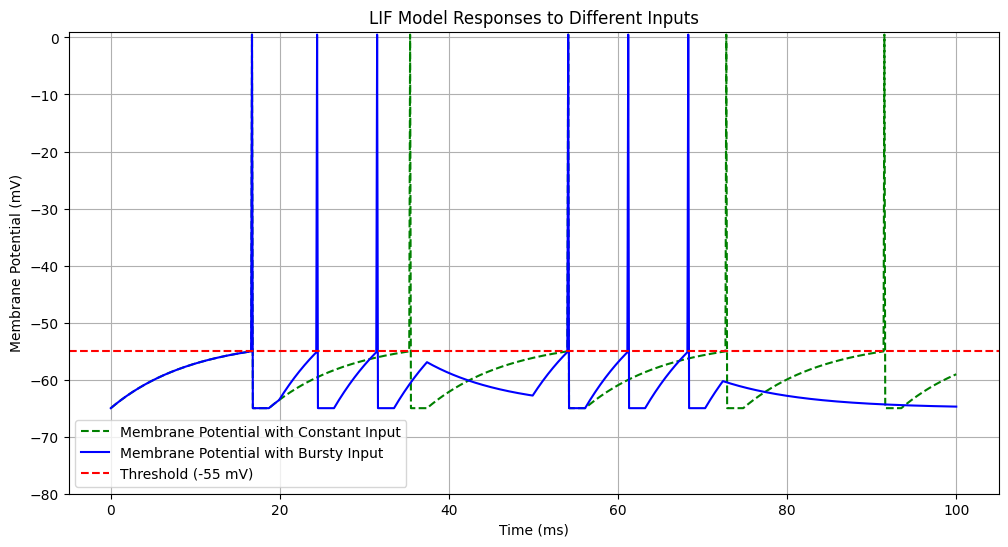

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def LIF_model_with_Na(I, duration, dt=0.1, V_rest=-65.0, V_threshold=-55.0, V_reset=-65.0, Rm=1.0, Cm=10.0, V_spike=0.5, Na_scale=0.03, refractory_period=2.0):
    """
    Simulates the Leaky Integrate-and-Fire model of a neuron with simple voltage-gated sodium channels.
    I can now be a constant or an array of input currents over time.
    """
    time = np.arange(0, duration + dt, dt)
    n_steps = len(time)
    V = np.zeros(n_steps)
    Na_conductance_values = np.zeros(n_steps)  # Array to store sodium conductance values
    V[0] = V_rest
    spikes = []
    last_spike_time = -refractory_period  # Initialize to a time before start
    
    for i in range(1, n_steps):
        # Check if I is a scalar or array
        current_input = I if np.isscalar(I) else I[i]
        
        # Sodium conductance (simplified representation)
        Na_conductance = Na_scale * (V[i - 1] - V_rest)
        Na_conductance_values[i] = Na_conductance  # Stores conductance values
        
        if time[i] - last_spike_time < refractory_period:
            V[i] = V_reset
        else:
            # Calculate membrane potential with sodium conductance
            dVdt = (-(V[i - 1] - V_rest) + current_input * Rm - Na_conductance) / (Rm * Cm)
            V[i] = V[i - 1] + dVdt * dt
            
            if V[i] >= V_threshold:
                spikes.append(time[i])
                V[i - 1] = V_spike  # Spike occurs
                V[i] = V_reset
                last_spike_time = time[i]
                Na_conductance = 0  # Reset sodium conductance
                
    return time, V, spikes, Na_conductance_values

# Define simulation parameters
duration = 100
dt = 0.1

# Scenario 1: Constant input
I_constant = 12.5 

# Scenario 2: Bursty input
I_bursty = np.zeros(int(duration / dt) + 1)
#Initial input
I_bursty[0:200] = 12.5  # Initial burst of high input right at the start
# First burst
I_bursty[200:375] = 25  # First burst of high input
# Second burst, ensure there's a gap between the first and second burst
I_bursty[500:725] = 25  # Second burst of high input

# Run simulations
time, V_constant, spikes_constant, _ = LIF_model_with_Na(I=I_constant, duration=duration, dt=dt, refractory_period=2.0)
time, V_bursty, spikes_bursty, _ = LIF_model_with_Na(I=I_bursty, duration=duration, dt=dt, refractory_period=2.0)

# Plot the results
plt.figure(figsize=(12, 6))

# Membrane potential for constant input
plt.plot(time, V_constant, label='Membrane Potential with Constant Input', color='green', linestyle='--')

# Membrane potential for bursty input
plt.plot(time, V_bursty, label='Membrane Potential with Bursty Input', color='blue')

plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
plt.title('LIF Model Responses to Different Inputs')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.ylim([-80, 1])
plt.grid(True)
plt.legend()
plt.show()

# Note: Sodium conductance plot and spike times print statements are omitted for brevity


## Question 5
The following code is a modified version of the updated LIF model with VGSCs to simulate how the spike train output differs when the input includes an inhibitory period. 

The following code is used to simulate how inhibitory effects affect the output spike train. There is a constant excitatory input for both of the graphs, but we added two sections of inhibitory input. When the inhibitory input is applied, the membrane potential is decreased. 

In [70]:
# Excitatory input
I_excitatory = 12.5 * np.ones(int(duration / dt) + 1)

# Mixed input: Excitatory and Inhibitory
I_mixed = 17.5 * np.ones_like(time)
I_mixed[int(15/dt):int(35/dt)] = -5  # Inhibitory period 1
I_mixed[int(70/dt):int(85/dt)] = -5  # Inhibitory period 2

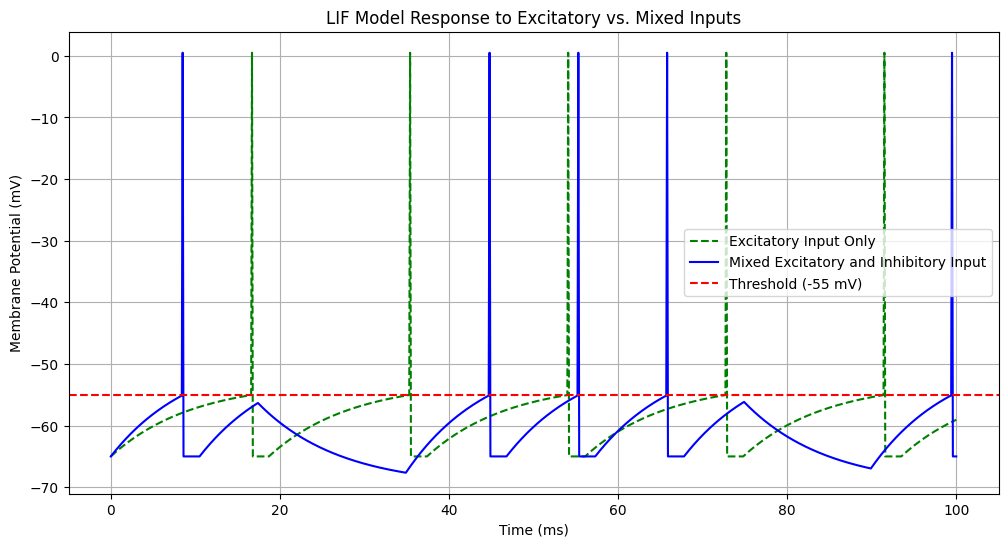

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def LIF_model_with_Na(I, duration, dt=0.1, V_rest=-65.0, V_threshold=-55.0, V_reset=-65.0, Rm=1.0, Cm=10.0, V_spike=0.5, Na_scale=0.03, refractory_period=2.0):
    time = np.arange(0, duration + dt, dt)
    n_steps = len(time)
    V = np.zeros(n_steps)
    V[0] = V_rest
    spikes = []
    last_spike_time = -refractory_period
    
    for i in range(1, n_steps):
        current_input = I[i] if not np.isscalar(I) else I
        
        Na_conductance = Na_scale * (V[i-1] - V_rest)
        
        if time[i] - last_spike_time < refractory_period:
            V[i] = V_reset
        else:
            dVdt = (-(V[i-1] - V_rest) + current_input * Rm - Na_conductance) / (Rm * Cm)
            V[i] = V[i-1] + dVdt * dt
    
            if V[i] >= V_threshold:
                spikes.append(time[i])
                V[i-1] = V_spike
                V[i] = V_reset
                last_spike_time = time[i]
                
    return time, V, spikes

# Define simulation parameters
duration = 100
dt = 0.1
time = np.arange(0, duration + dt, dt)

# Excitatory input
I_excitatory = 12.5 * np.ones_like(time)

# Mixed input: Excitatory and Inhibitory
I_mixed = 17.5 * np.ones_like(time)
I_mixed[int(17.5/dt):int(35/dt)] = -5  # Inhibitory period 1
I_mixed[int(75/dt):int(90/dt)] = -5  # Inhibitory period 2

# Run simulations
_, V_excitatory, _ = LIF_model_with_Na(I=I_excitatory, duration=duration, dt=dt)
_, V_mixed, _ = LIF_model_with_Na(I=I_mixed, duration=duration, dt=dt)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, V_excitatory, label='Excitatory Input Only', color='green', linestyle='--')
plt.plot(time, V_mixed, label='Mixed Excitatory and Inhibitory Input', color='blue')
plt.axhline(y=-55.0, color='r', linestyle='--', label='Threshold (-55 mV)')
plt.title('LIF Model Response to Excitatory vs. Mixed Inputs')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

## Question 6
### Factors Influencing Neuronal Firing
In neurophysiology, the firing of a neuron is influenced by many different factors, including presynaptic input, synaptic properties, and postsynaptic integrate-and-fire properties. 

**Presynaptic Input**: The signals received by a neuron from other neurons via their axon terminals are the presynaptic input. Many weak inputs must be coordinated, otherwise there will be no output. These inputs determine whether or not a neuron will generate an action potential. Presynaptic input is affected by the factors outlined below.  These inputs can be coordinated through different mechanisms, such as spatial & temporal summation, inhibition, presynaptic firing patterns, and the numbers of presynaptic cells firing. 
Spatial and Temporal Summation: Neurons integrate incoming signals through spatial and temporal summation. Multiple weak inputs must be coordinated to elicit an AP. Inputs that are close together spatially or temporally can summate, leading to a higher likelihood of AP generation. Spatial Summation occurs when inputs from multiple presynaptic neurons converge onto the postsynaptic neuron. If the combined excitatory inputs depolarize the postsynaptic membrane sufficiently, an action potential may be generated. Temporal Summation involves the integration of signals arriving at the synapse over time. Rapid succession of weak inputs can summate to reach the threshold for action potential initiation.
Inhibition: Inhibition can prevent, suppress, or interrupt firing. Firing relies on a balance between EPSPs and IPSPs. Inhibitory inputs can make contact anywhere throughout the postsynaptic neuron, with its location determining the intensity of its effect. Inhibitory postsynaptic potentials (IPSPs) can occur near the soma, suppressing all output. However, IPSPs occurring elsewhere interrupt output, with soma-proximal inhibition exerting a stronger effect.
The figure below shows how spatial summation, temporal summation, and inhibition can affect neuronal firing. The neuron fires only when the threshold is reached.

**Presynaptic Firing Patterns**: The firing patterns of presynaptic neurons also impact the firing pattern of the postsynaptic neuron. When presynaptic neurons fire action potentials in phase with each other, meaning their spikes occur at the same time or with consistent timing relative to one another, it enhances synaptic efficacy. This synchronization can lead to stronger depolarization of the postsynaptic membrane and increased probability of action potential generation. On the other hand, if presynaptic neurons fire out of phase, meaning the action potentials occur at different times, they don’t contribute to the postsynaptic response. This is also known as asynchronous firing, and it can result in weaker synaptic transmission because the threshold may or may not be reached. Therefore, neurons firing in phase drive the firing pattern, while those firing out of phase do not. 
Number of Presynaptic Cells Firing: The number of presynaptic cells firing affects the background level of depolarization. This factor influences the overall strength of synaptic input and the likelihood of postsynaptic firing. When multiple presynaptic cells fire simultaneously or in close succession, the combined activity can produce a stronger postsynaptic response. This is called population coding, and it allows for the encoding of different features of sensory stimuli through the coordinated activity of neuronal populations.

**Synaptic Properties**: Synapses are the junctions between neurons where communication occurs. The strength and plasticity of synapses also play a critical role in neuronal firing and information processing.

**Synaptic Plasticity**: Synaptic plasticity is the ability of synapses to undergo long-term modifications in efficacy, which can influence neuronal firing patterns. These modifications can be long-term potentiation or long-term depression. Long term potentiation is characterized by a long-lasting increase in the strength of synaptic transmission, resulting in enhanced EPSPs. They occur in response to high-frequency stimulation of presynaptic neurons, which to the activation of specific molecular pathways that lead to an increase in neurotransmitter receptors at the postsynaptic membrane. This strengthening of synaptic connections allows for increased EPSPs between neurons and can last for extended periods of time. On the other hand, long term depression involves a consistent decrease in synaptic efficacy, which causes less EPSPs and more IPSPs. Long term depression occurs as a result of low-frequency stimulation of presynaptic neurons and weakened synapse connections. 

**Synaptic Strength**: The strength of a synapse also influences neuronal firing and network activity. The strength of synaptic transmission is affected by neurotransmitter release, receptor density, and postsynaptic sensitivity. The amount of neurotransmitters released by the presynaptic neuron in response to an action potential directly impacts the strength of postsynaptic potentials. Higher levels of neurotransmitter release result in stronger synaptic transmission and increased postsynaptic depolarization. The density of neurotransmitter receptors on the postsynaptic membrane influences the responsiveness of the postsynaptic neuron to synaptic inputs. Higher receptor density enhances synaptic strength, while reductions in receptor density can weaken synaptic transmission. Additionally, alterations in receptor sensitivity can modulate synaptic strength and contribute to synaptic plasticity.

**Postsynaptic Integrate-and-Fire Properties**: Postsynaptic integrate-and-fire properties refer to the characteristics of the postsynaptic neuron that determine whether an action potential is generated in response to synaptic inputs. The postsynaptic neuron's membrane potential and threshold are integral to determining whether an action potential is generated.

**Threshold and Membrane Potential**: The resting membrane potential is the steady-state voltage difference across the neuronal membrane when the cell is not actively transmitting signals. The resting membrane potential establishes the baseline level of excitability in the neuron and influences its responsiveness to synaptic inputs. The threshold potential is the membrane potential that must be reached for an action potential to be initiated. It represents the critical level of depolarization required to trigger the opening of voltage-gated sodium channels and the rapid influx of sodium ions, leading to the generation of an action potential. Below the threshold, the neuron remains in a resting state, while surpassing the threshold initiates the series of events resulting in the generation of an action potential. This threshold, along with the resting membrane potential, can be modulated by neuromodulators, altering the excitability of the neuron.

**Neuromodulation**: Neuromodulators are signaling molecules that regulate the excitability and synaptic transmission of neurons by modulating the ratio of voltage-gated ion channels and receptors. These molecules can have significant effects on postsynaptic integrate-and-fire properties by altering the membrane potential and threshold of the neuron. Some neuromodulators, such as serotonin and dopamine, can depolarize the postsynaptic membrane potential and lower the threshold for action potential initiation. This is known as excitatory modulation and it enhances the excitability of the neuron, making it more likely to generate action potentials in response to synaptic inputs. Inhibitory Modulation, on the other hand, reduces the likelihood of action potential generation, and inhibits neuronal excitability and synaptic transmission. Examples include GABA and glycine, which may hyperpolarize the membrane potential and raise the threshold for action potential firing. 


## Question 7 (Cats!)

A fun fact about cats is that they have a unique grooming behavior called "whisker fatigue." Whisker fatigue occurs when a cat's sensitive whiskers become overstimulated by repeatedly touching surfaces. Whiskers are highly sensitive and are important for a cat's spatial awareness. When a cat's whiskers repeatedly touch the sides of food dishes or other objects while eating or exploring, it can cause discomfort or stress. To alleviate this, some cats may prefer wider food dishes or bowls that don't come into contact with their whiskers, helping them feel more comfortable during meal times.